In [155]:
 # Import libraries necessary for this project
import numpy as np
import pandas as pd
import requests
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing

In [156]:
def api_property_list_sold(city, state, prop_type, limit=200):
    
  # url for api
  url = "https://realtor.p.rapidapi.com/properties/v2/list-sold"

  # enter parameters
  querystring = {
    "sort":"sold_date",
    "city":city,
    "offset":"0",
    "state_code":state,
    "limit":limit,
    "prop_type":prop_type
  }

  headers = {
    'x-rapidapi-host': "realtor.p.rapidapi.com",
    'x-rapidapi-key': "95338ea407msh3cf14ebb0eb2e8dp107b98jsnbd45c26c0423"
  }

  response = requests.request("GET", url, headers=headers, params=querystring)
  return response.json() # json format

In [157]:
def process_list_sold_response(response_json):

    """
    Process the list for sale API response.

    Convert each listing to a dataframe, append to a list, and concatenate to one dataframe.

    Parameters
    ----------
    @response_json [dictionary]: API response for list sold

    Returns
    -------
    [dataframe] Dataframe of all list sold responses

    """

    # empty dataframe
    dataframe_list = []

    # iterate through each sold listing
    for l in response_json['properties']:

        # convert each listing to dataframe
        _temp_df = pd.DataFrame.from_dict(l, orient='index').T

        # append to dataframe list for all listings
        dataframe_list.append(_temp_df)

    # concatenate all dataframes, for missing col values enter null value
    return pd.concat(dataframe_list, axis=0, ignore_index=True, sort=False)

In [158]:
# api key to access data
city = "Gainesville"
state = "FL"
prop_type = "single_family"

In [159]:
property_list_sold_response = api_property_list_sold(city=city, 
                                                     state=state, 
                                                     prop_type=prop_type,
                                                     limit=200)

In [160]:
property_list_sold_response

{'meta': {'build': '3.23.112',
  'schema': 'core.3',
  'tracking_params': {'channel': 'not_for_sale',
   'siteSection': 'not_for_sale',
   'city': 'Gainesville',
   'county': 'unknown',
   'neighborhood': 'unknown',
   'searchCityState': 'Gainesville, FL',
   'state': 'FL',
   'zip': 'unknown',
   'srpPropertyStatus': 'srp:not_for_sale',
   'listingActivity': 'unknown',
   'propertyStatus': 'not_for_sale',
   'propertyType': 'single_family',
   'searchBathrooms': 'any',
   'searchBedrooms': 'any',
   'searchMaxPrice': 'unknown',
   'searchMinPrice': 'unknown',
   'searchRadius': 'unknown',
   'searchHouseSqft': 'any',
   'searchLotSqft': 'any',
   'searchResults': '200',
   'sortResults': 'sold_date',
   'searchCoordinates': 'unknown',
   'version': '1.0'},
  'tracking': 'type|meta|data|resource_type|property_list|query|client_id|rdc_mobile_native,13.3.0.53|os|13.3.1|prop_status|recently_sold|schema|core.3|limit|offset|city|Gainesville|state_code|FL|sort|sold_date|prop_type|single_fami

In [161]:
df_properties_sold_raw = process_list_sold_response(response_json=property_list_sold_response)
df_properties_sold_raw.head()

,property_id,listing_id,prop_type,list_date,last_update,year_built,beds,baths_full,garage,baths_half,...,rdc_app_url,baths,data_source_name,page_no,rank,list_tracking,is_new_construction,photo_count,photos,price_reduced_date
0,O5262445755,2914388819,single_family,2020-03-19T21:21:50Z,2020-07-13T17:41:35Z,2015,4,2,2,1,...,move-rdc://www.realtor.com/realestateandhomes-...,3,mls,1,1,type|property|data|prop_id|5262445755|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",NaN
1,O5611787983,2912966634,single_family,2020-02-12T21:34:00Z,2020-07-10T17:18:35Z,2009,6,4,3,None,...,move-rdc://www.realtor.com/realestateandhomes-...,4,mls,1,2,type|property|data|prop_id|5611787983|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",2020-03-10T13:31:46.021Z
2,O6900220863,2916435419,single_family,2020-05-21T01:55:36Z,2020-07-10T19:33:02Z,2018,3,2,2,None,...,move-rdc://www.realtor.com/realestateandhomes-...,2,mls,1,3,type|property|data|prop_id|6900220863|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",NaN
3,O9335927105,651643138,single_family,2019-02-20T17:49:25Z,2020-07-10T19:36:54Z,2019,3,2,2,1,...,move-rdc://www.realtor.com/realestateandhomes-...,3,mls,1,4,type|property|data|prop_id|9335927105|list_id|...,True,21,"[{'description': None, 'href': 'https://ap.rdc...",NaN
4,O6936044806,2914249485,single_family,2020-03-16T12:36:49Z,2020-07-10T19:07:59Z,2001,4,2,2,None,...,move-rdc://www.realtor.com/realestateandhomes-...,2,mls,1,5,type|property|data|prop_id|6936044806|list_id|...,False,22,"[{'description': None, 'href': 'https://ap.rdc...",2020-05-20T16:49:18.187Z


In [162]:
# Output dataframe to CSV so that project data will stay consistent
df_properties_sold_raw.to_csv(r'C:\Users\green\OneDrive\Documents\DSC680\Project1\HomePricesGainesville071320.csv', 
                              index=False, sep=',',encoding='utf-8')

In [163]:
df = pd.read_csv(r'C:\Users\green\OneDrive\Documents\DSC680\Project1\HomePricesGainesville071320.csv')
df.head()

,property_id,listing_id,prop_type,list_date,last_update,year_built,beds,baths_full,garage,baths_half,...,rdc_app_url,baths,data_source_name,page_no,rank,list_tracking,is_new_construction,photo_count,photos,price_reduced_date
0,O5262445755,2914388819,single_family,2020-03-19T21:21:50Z,2020-07-13T17:41:35Z,2015,4,2,2.0,1.0,...,move-rdc://www.realtor.com/realestateandhomes-...,3,mls,1,1,type|property|data|prop_id|5262445755|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",NaN
1,O5611787983,2912966634,single_family,2020-02-12T21:34:00Z,2020-07-10T17:18:35Z,2009,6,4,3.0,NaN,...,move-rdc://www.realtor.com/realestateandhomes-...,4,mls,1,2,type|property|data|prop_id|5611787983|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",2020-03-10T13:31:46.021Z
2,O6900220863,2916435419,single_family,2020-05-21T01:55:36Z,2020-07-10T19:33:02Z,2018,3,2,2.0,NaN,...,move-rdc://www.realtor.com/realestateandhomes-...,2,mls,1,3,type|property|data|prop_id|6900220863|list_id|...,False,30,"[{'description': None, 'href': 'https://ap.rdc...",NaN
3,O9335927105,651643138,single_family,2019-02-20T17:49:25Z,2020-07-10T19:36:54Z,2019,3,2,2.0,1.0,...,move-rdc://www.realtor.com/realestateandhomes-...,3,mls,1,4,type|property|data|prop_id|9335927105|list_id|...,True,21,"[{'description': None, 'href': 'https://ap.rdc...",NaN
4,O6936044806,2914249485,single_family,2020-03-16T12:36:49Z,2020-07-10T19:07:59Z,2001,4,2,2.0,NaN,...,move-rdc://www.realtor.com/realestateandhomes-...,2,mls,1,5,type|property|data|prop_id|6936044806|list_id|...,False,22,"[{'description': None, 'href': 'https://ap.rdc...",2020-05-20T16:49:18.187Z


In [164]:
# Drop columns that are identifiers only
df.drop(columns=['property_id', 'listing_id', 'prop_type', 'list_date', 'last_update', 'prop_status', 'address', 'mls', 
                 'client_display_flags', 'sold_history', 'office', 'agents', 'rdc_web_url', 'rdc_app_url', 'data_source_name', 
                 'page_no', 'rank', 'list_tracking', 'photos', 'price_reduced_date'], inplace=True)
df.head()

,year_built,beds,baths_full,garage,baths_half,lot_size,building_size,price,baths,is_new_construction,photo_count
0,2015,4,2,2.0,1.0,"{'size': 7841, 'units': 'sqft'}","{'size': 2715, 'units': 'sqft'}",415000,3,False,30
1,2009,6,4,3.0,NaN,"{'size': 43996, 'units': 'sqft'}","{'size': 3771, 'units': 'sqft'}",720000,4,False,30
2,2018,3,2,2.0,NaN,"{'size': 10454, 'units': 'sqft'}","{'size': 1682, 'units': 'sqft'}",312000,2,False,30
3,2019,3,2,2.0,1.0,"{'size': 4792, 'units': 'sqft'}","{'size': 1942, 'units': 'sqft'}",295000,3,True,21
4,2001,4,2,2.0,NaN,"{'size': 7841, 'units': 'sqft'}","{'size': 2411, 'units': 'sqft'}",375000,2,False,22


In [165]:
# Replace 'NaN' values with '0'
df= df.replace(np.nan,0)
df.head()

,year_built,beds,baths_full,garage,baths_half,lot_size,building_size,price,baths,is_new_construction,photo_count
0,2015,4,2,2.0,1.0,"{'size': 7841, 'units': 'sqft'}","{'size': 2715, 'units': 'sqft'}",415000,3,False,30
1,2009,6,4,3.0,0.0,"{'size': 43996, 'units': 'sqft'}","{'size': 3771, 'units': 'sqft'}",720000,4,False,30
2,2018,3,2,2.0,0.0,"{'size': 10454, 'units': 'sqft'}","{'size': 1682, 'units': 'sqft'}",312000,2,False,30
3,2019,3,2,2.0,1.0,"{'size': 4792, 'units': 'sqft'}","{'size': 1942, 'units': 'sqft'}",295000,3,True,21
4,2001,4,2,2.0,0.0,"{'size': 7841, 'units': 'sqft'}","{'size': 2411, 'units': 'sqft'}",375000,2,False,22


In [166]:
def trim(dftotrim):
    # Trim off size and unit strings 
           
    dftotrim['lot_size'] = dftotrim['lot_size'].str.extract('(\d+)')
    dftotrim['building_size'] = dftotrim['building_size'].str.extract('(\d+)').astype(int)

In [167]:
trim(df)
# Output dataframe to CSV so that project data can be reviewed
df.to_csv(r'C:\Users\green\OneDrive\Documents\DSC680\Project1\HomePricesGainesville071320trim.csv', 
                              index=False, sep=',',encoding='utf-8')
df.head()

,year_built,beds,baths_full,garage,baths_half,lot_size,building_size,price,baths,is_new_construction,photo_count
0,2015,4,2,2.0,1.0,7841,2715,415000,3,False,30
1,2009,6,4,3.0,0.0,43996,3771,720000,4,False,30
2,2018,3,2,2.0,0.0,10454,1682,312000,2,False,30
3,2019,3,2,2.0,1.0,4792,1942,295000,3,True,21
4,2001,4,2,2.0,0.0,7841,2411,375000,2,False,22


In [168]:
#  Univariate Statistics

def unistats(df):
    # Create some statistics
    
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Mean', 'Mode', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, df[col].mean(), 
                                  df[col].mode().values[0], df[col].min(), df[col].quantile(.25), df[col].median(), 
                                  df[col].quantile(.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, '-', 
                                  df[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df

In [169]:
unistats(df)

,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
year_built,200,0,70,int64,1987.74,2020,1926,1971.75,1990,2006,2020,22.6816,-0.393851,-0.756325
beds,200,0,5,int64,3.385,3,2,3,3,4,6,0.774451,0.980564,1.91064
baths_full,200,0,4,int64,2.205,2,1,2,2,2,4,0.644244,0.920307,1.46575
garage,200,0,5,float64,1.495,2,0,1,2,2,4,0.935065,-0.581364,-0.711279
baths_half,200,0,4,float64,0.195,0,0,0,0,0,3,0.456087,2.6377,8.54149
lot_size,197,3,66,object,-,14375,-,-,-,-,-,-,-,-
building_size,200,0,187,int32,2002.18,1722,750,1457.25,1826,2335.75,6250,800.736,1.58364,4.01553
price,200,0,162,int64,291158,175000,38249,207188,275250,340795,1100000,137685,1.92402,6.89359
baths,200,0,6,int64,2.4,2,1,2,2,3,7,0.868199,1.68467,4.47754
is_new_construction,200,0,2,bool,0.085,False,False,0,0,0,True,0.279582,2.99871,7.06279


In [170]:
# There are 3 entries where lot size is missing.  Remove those.
df['lot_size'].replace('', np.nan, inplace=True)
df.dropna(subset=['lot_size'], inplace=True)
unistats(df)


,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
year_built,197,0,70,int64,1987.82,2020,1926,1972,1990,2006,2020,22.7216,-0.401761,-0.746205
beds,197,0,5,int64,3.39086,3,2,3,3,4,6,0.778878,0.957896,1.84389
baths_full,197,0,4,int64,2.20812,2,1,2,2,2,4,0.648652,0.901513,1.39488
garage,197,0,5,float64,1.50254,2,0,1,2,2,4,0.934729,-0.594391,-0.687867
baths_half,197,0,4,float64,0.19797,0,0,0,0,0,3,0.458921,2.61074,8.36578
lot_size,197,0,66,object,-,14375,-,-,-,-,-,-,-,-
building_size,197,0,184,int32,2008.86,1722,750,1458,1832,2350,6250,802.947,1.57974,3.98192
price,197,0,161,int64,292115,175000,38249,208000,275500,341500,1100000,138221,1.91657,6.8329
baths,197,0,6,int64,2.40609,2,1,2,2,3,7,0.873396,1.66071,4.36696
is_new_construction,197,0,2,bool,0.0862944,False,False,0,0,0,True,0.281514,2.9693,6.88653


In [171]:
# Change variable type from float or object to int
df['garage'] = df['garage'].astype(int)
df['baths_half'] = df['baths_half'].astype(int)
df['lot_size'] = df['lot_size'].astype(int)
unistats(df)

,Count,Missing,Unique,Dtype,Mean,Mode,Min,25%,Median,75%,Max,Std,Skew,Kurt
year_built,197,0,70,int64,1987.817259,2020,1926,1972.0,1990.0,2006.0,2020,22.721632,-0.401761,-0.746205
beds,197,0,5,int64,3.390863,3,2,3.0,3.0,4.0,6,0.778878,0.957896,1.843893
baths_full,197,0,4,int64,2.208122,2,1,2.0,2.0,2.0,4,0.648652,0.901513,1.394880
garage,197,0,5,int32,1.502538,2,0,1.0,2.0,2.0,4,0.934729,-0.594391,-0.687867
baths_half,197,0,4,int32,0.197970,0,0,0.0,0.0,0.0,3,0.458921,2.610742,8.365780
lot_size,197,0,66,int32,24061.949239,8712,2614,7405.0,10890.0,18731.0,871200,71581.793452,9.705158,106.440897
building_size,197,0,184,int32,2008.862944,1722,750,1458.0,1832.0,2350.0,6250,802.947063,1.579735,3.981924
price,197,0,161,int64,292115.101523,175000,38249,208000.0,275500.0,341500.0,1100000,138221.460278,1.916566,6.832904
baths,197,0,6,int64,2.406091,2,1,2.0,2.0,3.0,7,0.873396,1.660708,4.366960
is_new_construction,197,0,2,bool,0.086294,False,False,0.0,0.0,0.0,True,0.281514,2.969296,6.886530


In [172]:
# Bivariate Statistics

In [173]:
def bivstats(df, label):
    #Create empty DataFrame to store output
    output_df = pd.DataFrame(columns = ['r', 'p-value'])
    # r = Pearson Correlation
    
    for col in df: 
        if not col == label:      
            r, p = stats.pearsonr(df[label], df[col])
            output_df.loc[col] = [round(r, 3), round(p,5)]
    return output_df.sort_values(by=['r'], ascending=False)

In [174]:
bivstats(df, 'price')

,r,p-value
building_size,0.848,0.00000
baths,0.737,0.00000
baths_full,0.647,0.00000
beds,0.541,0.00000
garage,0.512,0.00000
baths_half,0.488,0.00000
year_built,0.345,0.00000
photo_count,0.306,0.00001
is_new_construction,0.114,0.10993
lot_size,0.107,0.13475


In [175]:
# Remove new construction feature
df.drop(columns=['is_new_construction'], inplace=True)

In [176]:
# scatter plots with histograms
def scatter(df, label):
    sns.set(color_codes = True)
    for col in df:        
        if not col == label:
            sns.jointplot(df[col], df[label], kind = 'reg')

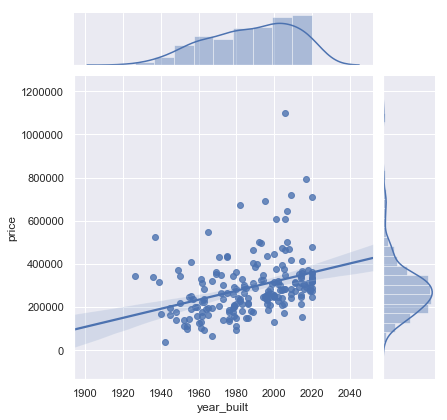

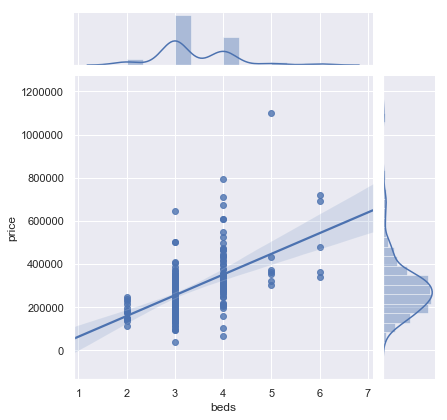

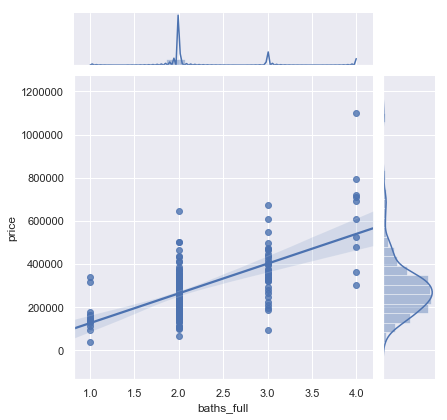

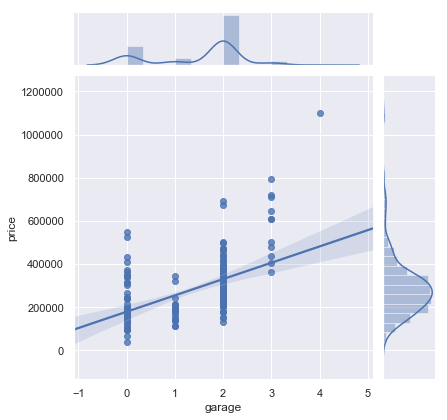

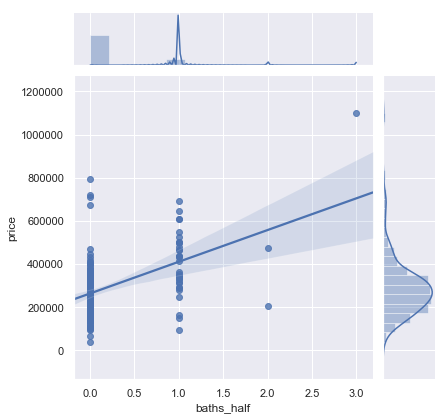

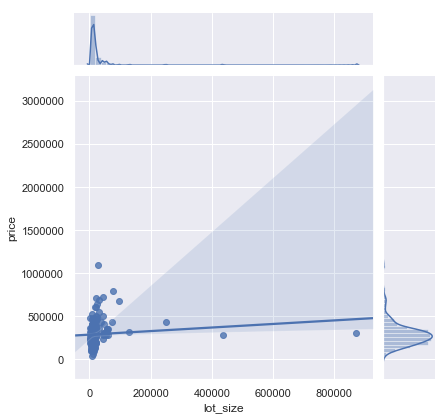

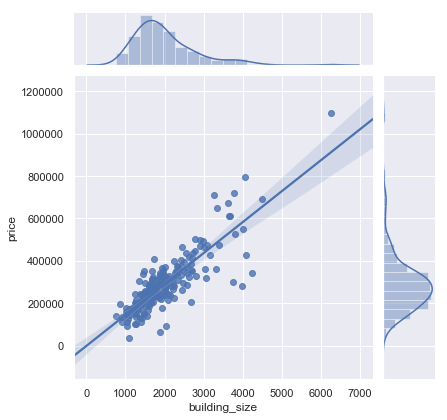

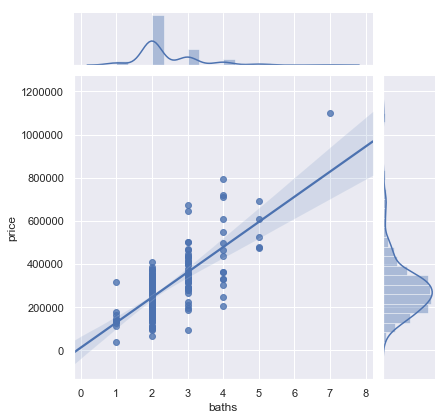

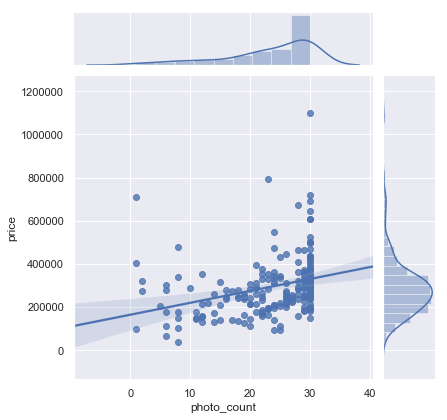

In [177]:
scatter(df, 'price')

In [178]:
# Investigate outliers 
# lot_size has 2 points that should be removed
# We can remove any lot_size entries above 200000
df.drop(df[df.lot_size > 200000].index, inplace=True)

In [179]:
#get new stats
bivstats(df, 'price')

,r,p-value
building_size,0.864,0.00000
baths,0.737,0.00000
baths_full,0.651,0.00000
beds,0.541,0.00000
garage,0.512,0.00000
baths_half,0.484,0.00000
lot_size,0.368,0.00000
year_built,0.344,0.00000
photo_count,0.303,0.00002


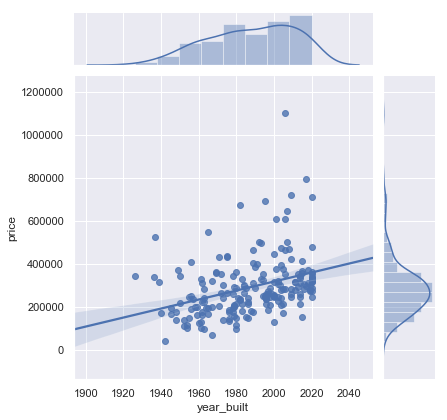

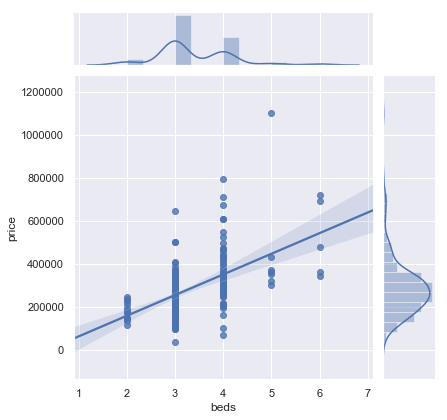

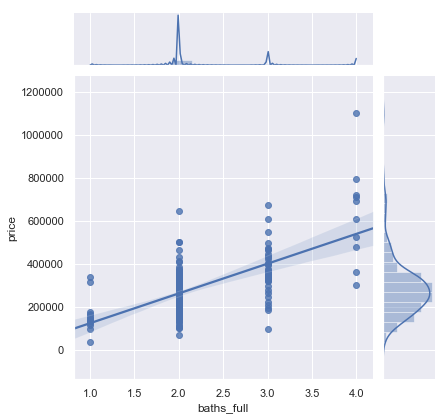

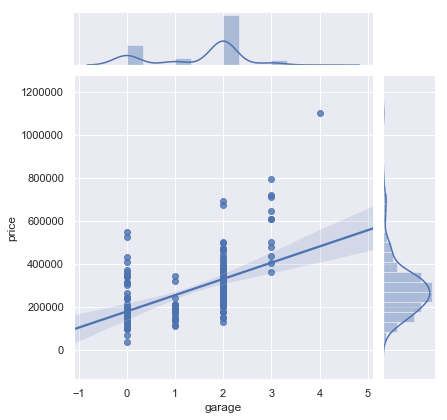

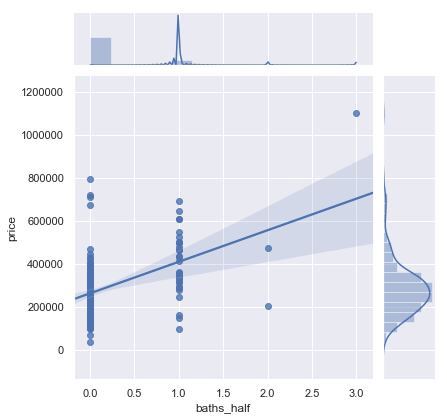

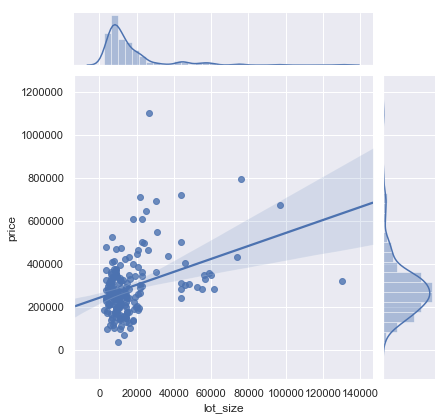

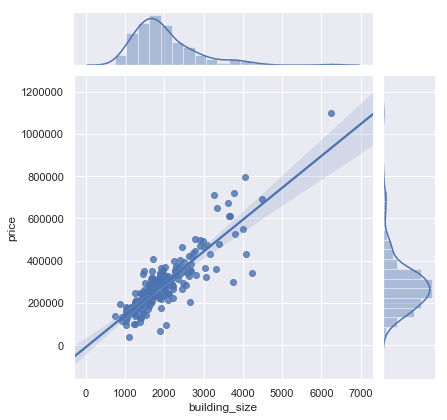

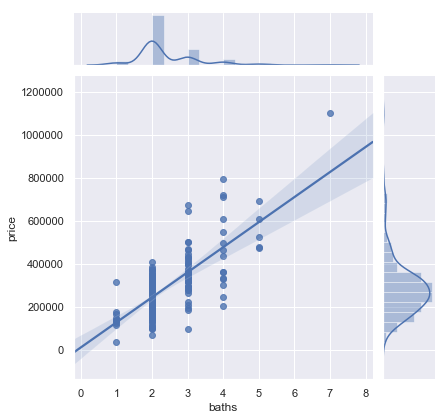

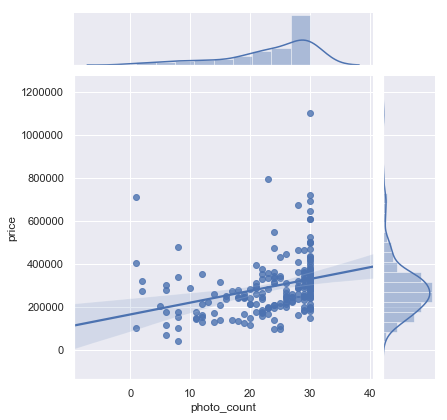

In [180]:
# Draw new scatter plots
scatter(df, 'price')

In [181]:
# Multivariate Statistics and Model Automation

In [182]:
# Perform scaling and preprocessing
def mlr_prepare(df):
    df = df.select_dtypes(np.number)
    df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns = df.columns)
    return df_minmax

df_minmax = mlr_prepare(df)
df_minmax.head()

C:\Users\green\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,year_built,beds,baths_full,garage,baths_half,lot_size,building_size,price,baths,photo_count
0,0.946809,0.50,0.333333,0.50,0.333333,0.040954,0.357273,0.354839,0.333333,1.000000
1,0.882979,1.00,1.000000,0.75,0.000000,0.324234,0.549273,0.642101,0.500000,1.000000
2,0.978723,0.25,0.333333,0.50,0.000000,0.061428,0.169455,0.257830,0.166667,1.000000
3,0.989362,0.25,0.333333,0.50,0.333333,0.017065,0.216727,0.241818,0.333333,0.689655
4,0.797872,0.50,0.333333,0.50,0.000000,0.040954,0.302000,0.317166,0.166667,0.724138


In [183]:
# Run MLR (Multivariate Linear Regression)
def mlr(df, label):
    y = df[label]
    X = df.drop(columns = [label]).assign(const = 1)
    results = sm.OLS(y, X).fit()
    return results

results = mlr(df, 'price')
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     97.94
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           2.36e-62
Time:                        23:29:42   Log-Likelihood:                -2411.4
No. Observations:                 194   AIC:                             4841.
Df Residuals:                     185   BIC:                             4870.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
year_built      789.7367    280.163      2.819      0.005     237.012    1342.461
beds          -2.508e+04   8854.295     -2.832      0.005   -4.25e+04   -7609.872
baths_full     2252.9963   7634.657      0.295      0.768   -1.28e+04    1.73e+04
garage         1.801e+04   7027.886      2.563      0.011    4145.570    3.19e+04
baths_half      1.04e+04   8018.483      1.297      0.196   -5417.147    2.62e+04
lot_size          0.5899      0.305      1.932      0.055      -0.012       1.192
building_size   133.4785     11.932     11.187      0.000     109.939     157.018
baths          1.266e+04   6131.613      2.064      0.040     558.399    2.48e+04
photo_count     583.7052    615.269      0.949      0.344    -630.140    1797.550
const         -1.548e+06   5.48e+05     -2.825      0.005   -2.63e+06   -4.67e+05
==============================================================================
Omnibus:                       16.358   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.259
Skew:                           0.216   Prob(JB):                     9.02e-11
Kurtosis:                       5.353   Cond. No.                     8.40e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [184]:
# Calculate fit stats and create a record entry for modeling results table
def mlr_fit(results, actual, roundto=10):
    #generate feature table that allows sorting coef labels based on t and p
    df_features = mlr_feature_df(results)
    residuals = np.array(actual) - np.array(results.fittedvalues)
    rmse = np.sqrt(sum((residuals**2))/len(actual))
    mae = np.mean(abs(np.array(actual) - np.array(results.fittedvalues)))
    fit_stats = [round(results.rsquared, roundto), round(results.rsquared_adj, roundto),
                round(results.rsquared - results.rsquared_adj, roundto), round(rmse, roundto), 
                round(mae, roundto), [df_features.index.values]]
    return fit_stats

fit_metrics_list = mlr_fit(results, df['price'])
fit_metrics_list

[0.8089883423,
 0.8007283787,
 0.0082599636,
 60545.2194291284,
 42215.1118309182,
 [array(['baths_full', 'photo_count', 'baths_half', 'lot_size', 'baths',
         'garage', 'year_built', 'beds', 'building_size'], dtype=object)]]

In [185]:
# Generate DataFrame that allows us to sort features by t and p values
def mlr_feature_df(results):
    df_features = pd.DataFrame({'coef':results.params, 't':abs(results.tvalues), 'p':round(results.pvalues,6)})
    df_features.drop(labels = ['const'], inplace = True)
    df_features = df_features.sort_values(by = ['t', 'p'])
    return df_features

df_features = mlr_feature_df(results)
df_features

,coef,t,p
baths_full,2252.996330,0.295101,0.768248
photo_count,583.705240,0.948700,0.344011
baths_half,10402.277465,1.297287,0.196148
lot_size,0.589930,1.932111,0.054873
baths,12655.273795,2.063939,0.040419
garage,18010.674925,2.562744,0.011181
year_built,789.736687,2.818849,0.005344
beds,-25078.244416,2.832325,0.005133
building_size,133.478468,11.186825,0.000000


In [186]:
# Control mlr and mlr_fit by removing certain features
def mlr_step(df, label, min = 2):
    #create empty model results table
    df_models = pd.DataFrame(columns = ['R2', 'R2a', 'diff', 'RMSE', 'MAE', 'features'])
    #prepare data by generating dummies and scaling
    df = mlr_prepare(df)
    #run first model with all features
    results = mlr(df, label)
    #generate fit stats for model
    df_models.loc[str(len(results.params))] = mlr_fit(results, df[label], 10)
    #generate feature table that allows sorting coef labels based on t and p
    df_features = mlr_feature_df(results)
    #step through series of reduced models until minimum # of features left
    while len(results.params) >= min:
        df = df.drop(columns = [df_features.index[0]])  #drop least effective feature
        results = mlr(df, label)                        #re-run next MLR
        df_features = mlr_feature_df(results)           #re-generate the features summary table
        df_models.loc[len(results.params)] = mlr_fit(results, df[label], 10)
    #save full models table to a csv
    df_models.to_csv('C:/Users/green/OneDrive/Documents/DSC680/Project1/' + label + '.csv')
    #return a shortened version without feature list
    df_models.drop(columns = ['features'], inplace = True)
    return df_models

In [188]:
df_models = mlr_step(df, 'price')
df_models

C:\Users\green\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,R2,R2a,diff,RMSE,MAE
10,0.808988,0.800728,0.008260,0.057024,0.039760
9,0.808988,0.800728,0.008260,0.057024,0.039760
8,0.808658,0.801457,0.007201,0.057073,0.039687
7,0.807802,0.801635,0.006167,0.057201,0.039991
6,0.803965,0.798751,0.005214,0.057769,0.040366
5,0.800753,0.796536,0.004217,0.058240,0.040586
4,0.794491,0.791246,0.003245,0.059148,0.042187
3,0.787645,0.785421,0.002224,0.060126,0.042550
2,0.746716,0.745397,0.001319,0.065665,0.045863
1,0.000000,0.000000,0.000000,0.130475,0.090606


In [194]:
# Analysis
#
# Looking at R2, it starts to decline more rapidly after the 8rd feature is removed.
# By looking at our price.csv that was created, we can see that we can remove: 
# photo_count (# of photos in the listing)
# baths_full (# of full bathrooms)
# baths_half (# of half bathrooms)
# baths (total # of bathrooms, half or full, in integers)
# year-built (year in which the house was built)
# beds (# of bedrooms)
#
# All of these features, once removed, hardly make a difference in R2, R2a, RMSE, or MAE.
# 
# The remaining features in decreasing importance are:
# building_size (square footage of house)
# garage (size of garage by # of cars it can fit)
#
# This really surprises me that the garage size is the second most important feature!


In [198]:
# Now lets remove the extraneous features and get a MLR equation
dfnew = df.drop(columns = ['photo_count', 'baths_full', 'baths_half', 'baths', 'year_built', 'beds', 'lot_size'])

results = mlr(dfnew, 'price')
fit_metrics_list = mlr_fit(results, df['price'])
df_features = mlr_feature_df(results)
df_features

,coef,t,p
garage,32248.794336,6.06734,0.0
building_size,136.814578,21.74955,0.0


In [200]:
# So our formula to predict price of a house would be price = (32248.8 * garage) + (136.8 * building_size)
# lets test with the 1st entry: price = (32248.8 * 2) + (136.8 * 2715) = 435909.6
# Actual price is 415000, off by 5%.  Lets add 'beds' back and see how we do.

In [199]:
dfnewer = df.drop(columns = ['photo_count', 'baths_full', 'baths_half', 'baths', 'year_built', 'lot_size'])

results = mlr(dfnewer, 'price')
fit_metrics_list = mlr_fit(results, df['price'])
df_features = mlr_feature_df(results)
df_features

,coef,t,p
beds,-20869.187595,2.515923,0.0127
garage,31145.804853,5.920354,0.0000
building_size,151.841693,17.630998,0.0000


In [201]:
# So our formula to predict price of a house would be price = (31145.8 * garage) + (151.8 * building_size) - (20869.2 * beds)
# lets test with the 1st entry: price = (31145.8 * 2) + (151.8 * 2715) - (20869.2 * 4) = 390951.8
# Actual price is 415000, off by 6%.  It appears our original assessment might be better.

In [202]:
# The price of a house in Gainesville, FL can be determined with ~95% accuracy with the following formula:
# price = 137x + 32249y, where x is the building size in sqft, and y is the size of the garage in cars.